In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
usecols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']
data = pd.read_csv('homework-data.csv', usecols=usecols)
data.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


// Q1: 10052 (reviews_per_month)

In [4]:
data.isna().mean() * 100

latitude                           0.000000
longitude                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [5]:
data

latitude  longitude  price  minimum_nights  number_of_reviews  \
0      40.64749  -73.97237    149               1                  9   
1      40.75362  -73.98377    225               1                 45   
2      40.80902  -73.94190    150               3                  0   
3      40.68514  -73.95976     89               1                270   
4      40.79851  -73.94399     80              10                  9   
...         ...        ...    ...             ...                ...   
48890  40.67853  -73.94995     70               2                  0   
48891  40.70184  -73.93317     40               4                  0   
48892  40.81475  -73.94867    115              10                  0   
48893  40.75751  -73.99112     55               1                  0   
48894  40.76404  -73.98933     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                    NaN                               1               365  
3                   4.64                               1               194  
4                   0.10                               1                 0  
...                  ...                             ...               ...  
48890                NaN                               2                 9  
48891                NaN                               2                36  
48892                NaN                               1                27  
48893                NaN                               6                 2  
48894                NaN                               1                23  

[48895 rows x 8 columns]

In [6]:
data.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

count        mean         std       min  \
latitude                        48895.0   40.728949    0.054530  40.49979   
longitude                       48895.0  -73.952170    0.046157 -74.24442   
price                           48895.0  152.720687  240.154170   0.00000   
minimum_nights                  48895.0    7.029962   20.510550   1.00000   
number_of_reviews               48895.0   23.274466   44.550582   0.00000   
reviews_per_month               38843.0    1.373221    1.680442   0.01000   
calculated_host_listings_count  48895.0    7.143982   32.952519   1.00000   
availability_365                48895.0  112.781327  131.622289   0.00000   

                                      0%       10%       25%        50%  \
latitude                        40.49979  40.66799  40.69010   40.72307   
longitude                      -74.24442 -73.99669 -73.98307  -73.95568   
price                            0.00000  49.00000  69.00000  106.00000   
minimum_nights                   1.00000   1.00000   1.00000    3.00000   
number_of_reviews                0.00000   0.00000   1.00000    5.00000   
reviews_per_month                0.01000   0.06000   0.19000    0.72000   
calculated_host_listings_count   1.00000   1.00000   1.00000    1.00000   
availability_365                 0.00000   0.00000   0.00000   45.00000   

                                       75%        90%         95%         99%  \
latitude                         40.763115   40.80489   40.825643   40.864661   
longitude                       -73.936275  -73.90781  -73.865771  -73.776920   
price                           175.000000  269.00000  355.000000  799.000000   
minimum_nights                    5.000000   28.00000   30.000000   45.000000   
number_of_reviews                24.000000   70.00000  114.000000  214.000000   
reviews_per_month                 2.020000    3.63000    4.640000    7.195800   
calculated_host_listings_count    2.000000    5.00000   15.000000  232.000000   
availability_365                227.000000  337.00000  359.000000  365.000000   

                                        max  
latitude                           40.91306  
longitude                         -73.71299  
price                           10000.00000  
minimum_nights                   1250.00000  
number_of_reviews                 629.00000  
reviews_per_month                  58.50000  
calculated_host_listings_count    327.00000  
availability_365                  365.00000

In [7]:
np.median(data['minimum_nights'])

3.0

// Q2: 3.0

In [8]:
def split_train_validate_test_df(data):
    n = len(data)
    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_test - n_val
    
    idx = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(idx)
    
    # splite data into train, test, validate
    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train + n_val]]
    df_test = data.iloc[idx[n_train + n_val:]]
    
    # restore index
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    
    return df_train, df_test, df_val

In [9]:
df_train, df_test, df_val = split_train_validate_test_df(data)

In [10]:
df_train, df_test, df_val = split_train_validate_test_df(data)

# Log tranformation price
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

del df_train['price']
del df_test['price']
del df_val['price']

In [11]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
data.hist(bins=100, ax=ax, layout=(3, 3), column=['price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

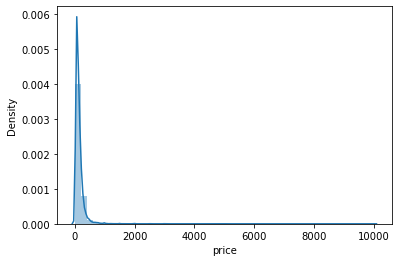

In [12]:
sns.distplot(data.price)

In [13]:
sns.distplot(np.log1p(data.price))

<AxesSubplot:xlabel='price', ylabel='Density'>

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
check = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
         'calculated_host_listings_count','availability_365']

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [17]:
df_train, df_test, df_val = split_train_validate_test_df(data)

# Log tranformation price
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
y_val = np.log1p(df_val.price.values)

del df_train['price']
del df_test['price']
del df_val['price']

In [18]:
mean = df_train['reviews_per_month'].mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w0_mean, w_mean = train_linear_regression(X_mean_train, y_train)
w0_mean, w_mean

(-423.53930828791164,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741553e-04, -6.63849280e-04,
         5.34563275e-03,  1.32706019e-03,  6.38794182e-04]))

In [20]:
X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w0_mean + X_val.dot(w_mean)
y_pred

array([4.56404917, 4.47586466, 4.72706726, ..., 4.76271671, 4.74761535,
       4.81081466])

In [21]:
round(rmse(y_val, y_pred), 2)

0.6427545031774909

In [23]:
X_0_train = prepare_X(df_train, fillna_value=0)
w0_0, w_0 = train_linear_regression(X_0_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w0_0 + X_val.dot(w_0)
round(rmse(y_val, y_pred), 2)

0.64

// Q3: Both (mean, 0) occure same result